# Manipulação e Interpretação de Dados

> Dados das aulas disponíveis no [repositório do curso](https://github.com/alura-tech/pos-datascience-analise-e-exploracao-de-dados/archive/refs/heads/Dados.zip) no GitHub

* Referências
  * [DataSUS](https://datasus.saude.gov.br/)
  * [Documentação Pandas](https://pandas.pydata.org/)

In [1]:
from urllib.request import urlretrieve
from pathlib import Path
from zipfile import ZipFile

DATA_URL = 'https://github.com/alura-tech/pos-datascience-analise-e-exploracao-de-dados/archive/refs/heads/Dados.zip'
DATA_PATH_RAW = './data/raw'
DATA_PATH_EXTRACTED = './data/interim'

Path(DATA_PATH_RAW).mkdir(parents=True, exist_ok=True)
Path(DATA_PATH_EXTRACTED).mkdir(parents=True, exist_ok=True)

urlretrieve(DATA_URL, DATA_PATH_RAW + '/data.zip')

with ZipFile(DATA_PATH_RAW + '/data.zip') as zip_ref:
    zip_ref.extractall(DATA_PATH_EXTRACTED)

In [2]:
import pandas as pd
from matplotlib import ticker
from matplotlib import pyplot as plt

In [3]:
FILE_PATH = './data/interim/pos-datascience-analise-e-exploracao-de-dados-Dados/A150850189_28_143_208.csv'

df = pd.read_csv(FILE_PATH,
                 encoding='ISO-8859-1', # Latin One
                 skiprows=3,
                 sep=';',
                 skipfooter=12,
                 thousands='.',
                 decimal=',')

df.shape

/tmp/ipykernel_5137/3580337901.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(FILE_PATH,


(27, 293)

In [4]:
colunas_usaveis = df.mean(numeric_only=True).index.tolist()

colunas_usaveis.insert(0, 'Unidade da Federação')

print('Tamanho colunas_usaveis', len(colunas_usaveis))
print('Colunas usáveis', colunas_usaveis[:5])
df[colunas_usaveis].head()

Tamanho colunas_usaveis 171
Colunas usáveis ['Unidade da Federação', '2007/Ago', '2007/Set', '2007/Out', '2007/Nov']


,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,9469279.43,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,1.088060e+09
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,4.752903e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,21911210.94,27406458.57,22341042.63,27923786.94,24515920.09,23973537.71,22175398.40,21614943.55,13806958.66,2.061943e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3681417.80,3475205.55,3320807.96,2907871.07,3.525463e+08
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,37925512.28,39042349.46,37113440.70,49625416.13,52558327.29,50907226.77,43876590.47,33718084.12,20837865.89,4.968812e+09


In [5]:
df_1 = df[colunas_usaveis]
df_1.set_index('Unidade da Federação', inplace=True)

df_1.tail()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,1.202913e+08,1.159919e+08,1.267303e+08,1.696877e+08,1.453025e+08,1.550843e+08,1.428123e+08,1.128054e+08,74954589.62,1.361334e+10
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,...,2.506972e+07,2.472700e+07,2.560076e+07,3.250618e+07,3.310106e+07,3.688563e+07,3.159520e+07,2.071197e+07,11302985.98,2.516383e+09
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,...,1.958000e+07,1.888971e+07,2.154459e+07,3.579084e+07,3.753402e+07,3.785947e+07,3.493713e+07,2.936420e+07,19849249.43,2.386584e+09
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,76052094.77,18149374.27,20992213.03,21049477.30,19162546.79,...,4.113318e+07,4.263870e+07,4.571547e+07,7.446406e+07,6.863041e+07,6.946733e+07,6.716235e+07,5.789129e+07,44939821.34,5.380179e+09
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,2.282263e+07,2.448472e+07,2.415606e+07,3.639103e+07,3.564176e+07,3.243456e+07,2.719646e+07,2.626552e+07,22156437.60,2.778457e+09


In [6]:
df_1['Total'] = df_1.sum(axis=1)

df_1.head()

/tmp/ipykernel_5137/4095460457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Total'] = df_1.sum(axis=1)


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,9469279.43,10045624.39,10677245.18,18147121.02,17753851.45,17659855.79,14435903.47,11834435.10,7371334.84,2.174436e+09
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3820865.83,4175526.06,5282655.42,5699597.78,5002272.59,4326882.24,3458187.11,2302711.01,1196754.85,9.505793e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,21911210.94,27406458.57,22341042.63,27923786.94,24515920.09,23973537.71,22175398.40,21614943.55,13806958.66,4.118591e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3193708.89,3557821.99,4172285.82,5427226.70,4192540.54,3681417.80,3475205.55,3320807.96,2907871.07,7.035953e+08
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,37925512.28,39042349.46,37113440.70,49625416.13,52558327.29,50907226.77,43876590.47,33718084.12,20837865.89,9.932985e+09


In [7]:
df_1.sort_values(by='Total', inplace=True, ascending=False)
df_1.head()

/tmp/ipykernel_5137/1621597728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.sort_values(by='Total', inplace=True, ascending=False)


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.049828e+09,1.730623e+08,1.706213e+08,1.703898e+08,1.725137e+08,...,3.386343e+08,3.614271e+08,3.528464e+08,5.029056e+08,5.044272e+08,5.481127e+08,5.031610e+08,4.043732e+08,3.019863e+08,8.844117e+10
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.064939e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.818334e+08,1.928442e+08,1.838915e+08,2.613767e+08,2.555458e+08,2.751518e+08,2.497139e+08,1.947341e+08,1.391578e+08,4.373855e+10
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.292128e+08,1.305328e+08,1.340772e+08,1.726362e+08,1.740403e+08,1.918616e+08,1.635809e+08,1.194080e+08,9.118772e+07,3.131148e+10
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,1.202913e+08,1.159919e+08,1.267303e+08,1.696877e+08,1.453025e+08,1.550843e+08,1.428123e+08,1.128054e+08,7.495459e+07,2.720137e+10
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.521758e+08,4.412816e+07,4.290791e+07,4.531559e+07,4.395135e+07,...,9.675269e+07,1.034684e+08,8.751876e+07,1.257351e+08,1.329651e+08,1.453727e+08,1.249090e+08,1.136609e+08,9.413736e+07,2.222044e+10


In [8]:
df_1.drop(['Total'], axis=1, inplace=True)
df_1.head()

/tmp/ipykernel_5137/1754948574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(['Total'], axis=1, inplace=True)


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.049828e+09,1.730623e+08,1.706213e+08,1.703898e+08,1.725137e+08,...,3.286878e+08,3.386343e+08,3.614271e+08,3.528464e+08,5.029056e+08,5.044272e+08,5.481127e+08,5.031610e+08,4.043732e+08,3.019863e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.064939e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.727309e+08,1.818334e+08,1.928442e+08,1.838915e+08,2.613767e+08,2.555458e+08,2.751518e+08,2.497139e+08,1.947341e+08,1.391578e+08
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.352787e+08,1.292128e+08,1.305328e+08,1.340772e+08,1.726362e+08,1.740403e+08,1.918616e+08,1.635809e+08,1.194080e+08,9.118772e+07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,1.176966e+08,1.202913e+08,1.159919e+08,1.267303e+08,1.696877e+08,1.453025e+08,1.550843e+08,1.428123e+08,1.128054e+08,7.495459e+07
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.521758e+08,4.412816e+07,4.290791e+07,4.531559e+07,4.395135e+07,...,8.392387e+07,9.675269e+07,1.034684e+08,8.751876e+07,1.257351e+08,1.329651e+08,1.453727e+08,1.249090e+08,1.136609e+08,9.413736e+07


In [9]:
df_1.to_csv('./data/interim/fase1_parte1_aula5-ordenados_total.csv')

In [10]:
mes_mais_recente = df_1.columns[-1]

mes_mais_recente

'2021/Ago'

In [11]:
gastos_mes_mais_recente = df_1[mes_mais_recente]

gastos_mes_mais_recente.head()

Unidade da Federação
35 São Paulo            3.019863e+08
31 Minas Gerais         1.391578e+08
41 Paraná               9.118772e+07
43 Rio Grande do Sul    7.495459e+07
33 Rio de Janeiro       9.413736e+07
Name: 2021/Ago, dtype: float64

<Axes: xlabel='Unidade da Federação'>

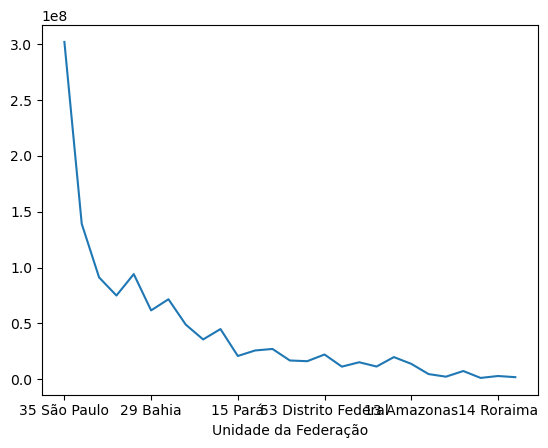

In [12]:
gastos_mes_mais_recente.plot()

<Axes: ylabel='2021/Ago'>

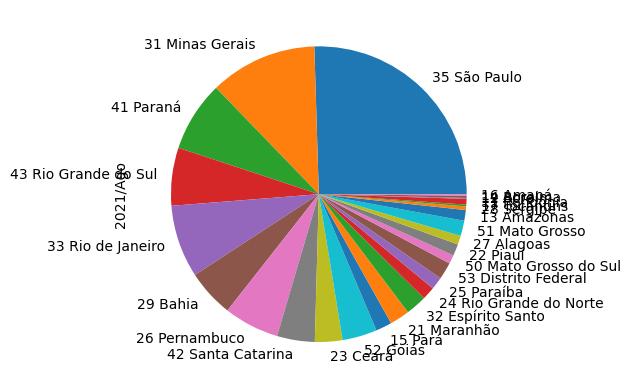

In [13]:
gastos_mes_mais_recente.plot(kind='pie')

* Difícil de identificar os elementos
* Qual é o maior? E o menor?
* Qual a diferença de proporcionalidade?
* Está ordenado ou não
* Número de elementos

In [14]:
import numpy as np

SEED = 42

np.random.seed(SEED)

<Axes: ylabel='2021/Ago'>

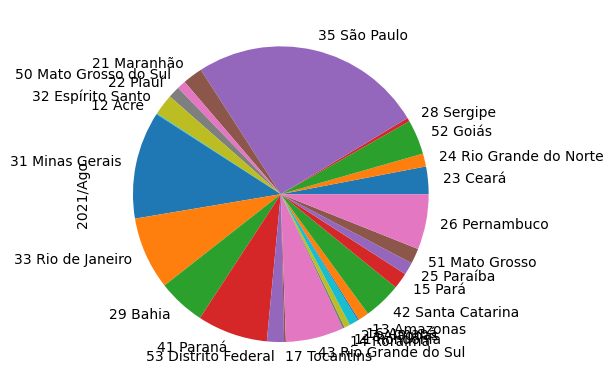

In [15]:
gastos_mes_mais_recente.sample(frac=1).plot(kind='pie')

In [16]:
gastos_mes_mais_recente

Unidade da Federação
35 São Paulo              3.019863e+08
31 Minas Gerais           1.391578e+08
41 Paraná                 9.118772e+07
43 Rio Grande do Sul      7.495459e+07
33 Rio de Janeiro         9.413736e+07
29 Bahia                  6.164569e+07
26 Pernambuco             7.162584e+07
42 Santa Catarina         4.888500e+07
23 Ceará                  3.565001e+07
52 Goiás                  4.493982e+07
15 Pará                   2.083787e+07
21 Maranhão               2.577967e+07
32 Espírito Santo         2.712745e+07
24 Rio Grande do Norte    1.680917e+07
25 Paraíba                1.616788e+07
53 Distrito Federal       2.215644e+07
50 Mato Grosso do Sul     1.130299e+07
22 Piauí                  1.522089e+07
27 Alagoas                1.139388e+07
51 Mato Grosso            1.984925e+07
13 Amazonas               1.380696e+07
28 Sergipe                4.636421e+06
17 Tocantins              2.304080e+06
11 Rondônia               7.371335e+06
12 Acre                   1.196755e+06
14 R

In [17]:
(gastos_mes_mais_recente / gastos_mes_mais_recente.loc['41 Paraná']) * 100

Unidade da Federação
35 São Paulo              331.169957
31 Minas Gerais           152.605877
41 Paraná                 100.000000
43 Rio Grande do Sul       82.198116
33 Rio de Janeiro         103.234688
29 Bahia                   67.603058
26 Pernambuco              78.547684
42 Santa Catarina          53.609189
23 Ceará                   39.095183
52 Goiás                   49.282754
15 Pará                    22.851613
21 Maranhão                28.270993
32 Espírito Santo          29.749020
24 Rio Grande do Norte     18.433588
25 Paraíba                 17.730325
53 Distrito Federal        24.297610
50 Mato Grosso do Sul      12.395294
22 Piauí                   16.691815
27 Alagoas                 12.494967
51 Mato Grosso             21.767458
13 Amazonas                15.141247
28 Sergipe                  5.084479
17 Tocantins                2.526744
11 Rondônia                 8.083692
12 Acre                     1.312408
14 Roraima                  3.188884
16 Amapá         

* Visualização não é gráfico bonito, é clareza na informação da exibição de dados

In [18]:
tabela_comparacao = gastos_mes_mais_recente / gastos_mes_mais_recente.loc['41 Paraná']

tabela_comparacao.head(5)

Unidade da Federação
35 São Paulo            3.311700
31 Minas Gerais         1.526059
41 Paraná               1.000000
43 Rio Grande do Sul    0.821981
33 Rio de Janeiro       1.032347
Name: 2021/Ago, dtype: float64

<Axes: ylabel='2021/Ago'>

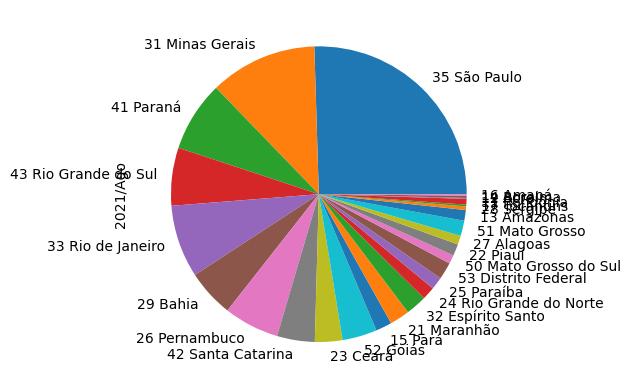

In [19]:
tabela_comparacao.plot(kind='pie')

<Axes: xlabel='Unidade da Federação'>

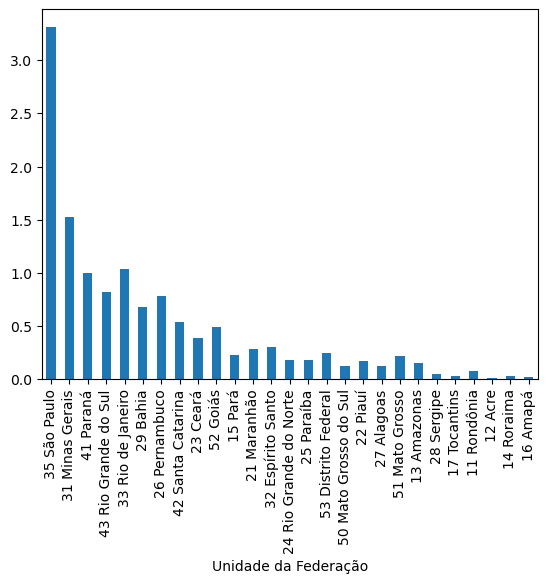

In [20]:
tabela_comparacao.plot(kind='bar')

<Axes: ylabel='Unidade da Federação'>

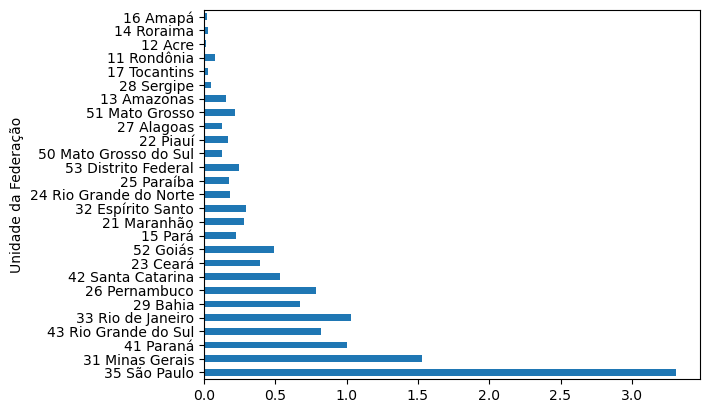

In [21]:
tabela_comparacao.plot(kind='barh')

In [22]:
tabela_comparacao = gastos_mes_mais_recente / gastos_mes_mais_recente.loc['41 Paraná']

tabela_comparacao.sort_values(ascending=False, inplace=True)

tabela_comparacao.head(5)

Unidade da Federação
35 São Paulo            3.311700
31 Minas Gerais         1.526059
33 Rio de Janeiro       1.032347
41 Paraná               1.000000
43 Rio Grande do Sul    0.821981
Name: 2021/Ago, dtype: float64

<Axes: xlabel='Unidade da Federação'>

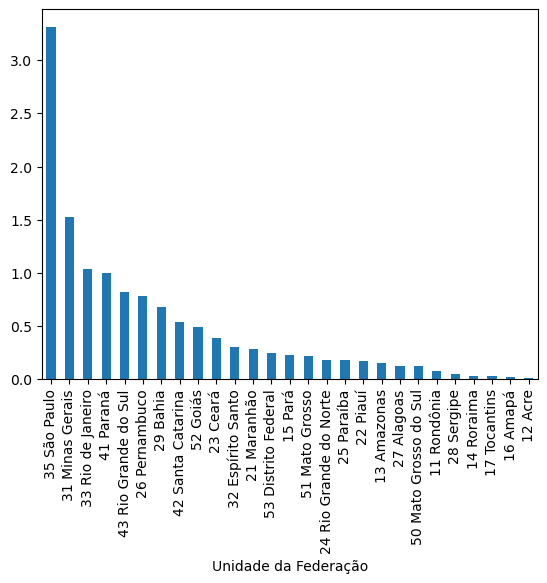

In [23]:
tabela_comparacao.plot(kind='bar')

### Desafio 1: Atualizar o último gráfico para refletir o seu Estado

In [24]:
tabela_comparacao = gastos_mes_mais_recente / gastos_mes_mais_recente.loc['35 São Paulo']
tabela_comparacao.head()

Unidade da Federação
35 São Paulo            1.000000
31 Minas Gerais         0.460808
41 Paraná               0.301960
43 Rio Grande do Sul    0.248205
33 Rio de Janeiro       0.311727
Name: 2021/Ago, dtype: float64

<Axes: xlabel='Unidade da Federação'>

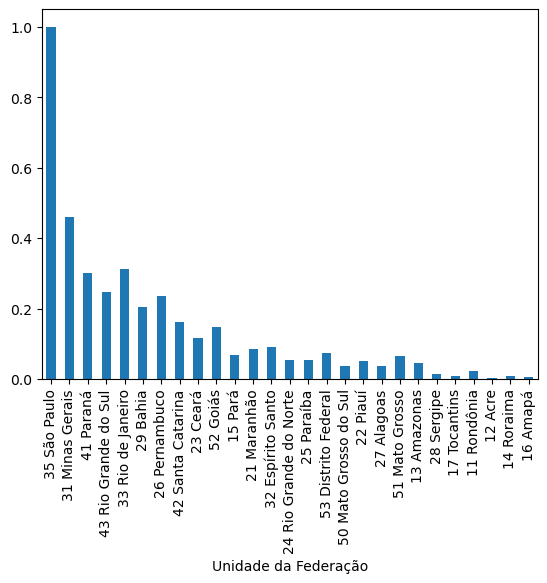

In [25]:
tabela_comparacao.plot(kind='bar')

### Desafio 2: Gastos por população de dois estados

In [26]:
gastos_mes_mais_recente.loc[['41 Paraná', '33 Rio de Janeiro']]

Unidade da Federação
41 Paraná            91187722.64
33 Rio de Janeiro    94137361.39
Name: 2021/Ago, dtype: float64

In [27]:
# Fontes:
# RJ https://www.ibge.gov.br/cidades-e-estados/rj.html
# PR https://www.ibge.gov.br/cidades-e-estados/pr.html

POPULACAO = pd.Series([11444380, # PR
                      16055174]) # RJ

gastos_mes_mais_recente.loc[['41 Paraná', '33 Rio de Janeiro']].values / POPULACAO.values

array([7.96790413, 5.863366  ])

<Axes: xlabel='Unidade da Federação'>

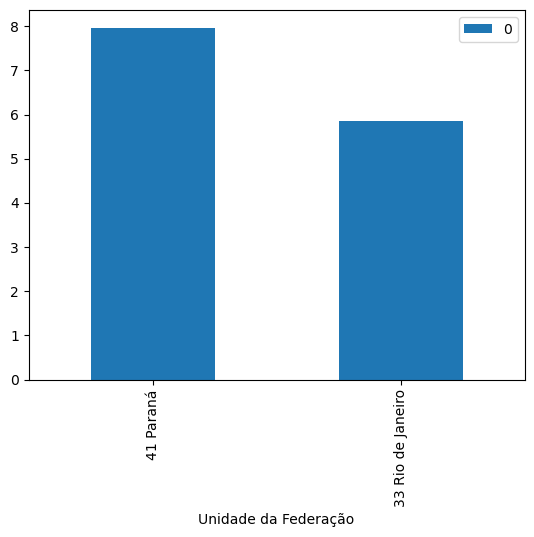

In [28]:
pd.DataFrame(data=(gastos_mes_mais_recente.loc[['41 Paraná', '33 Rio de Janeiro']].values / POPULACAO.values),
             index=gastos_mes_mais_recente.loc[['41 Paraná', '33 Rio de Janeiro']].index).plot(kind='bar')

### Desafio 3: Colorir o seu Estado

<Axes: xlabel='Unidade da Federação'>

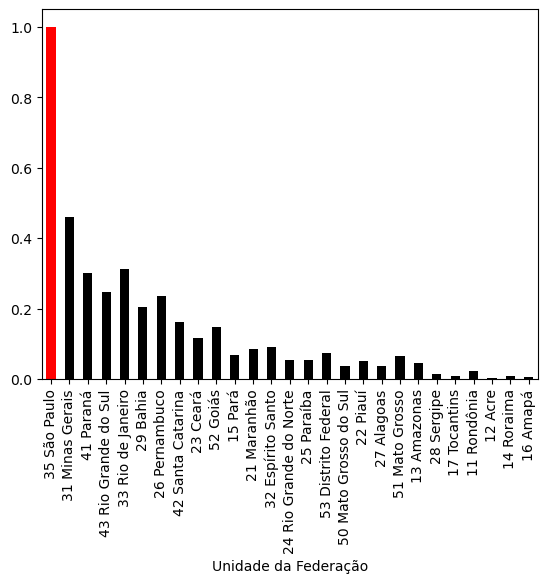

In [29]:
tabela_comparacao = gastos_mes_mais_recente / gastos_mes_mais_recente.loc['35 São Paulo']

colors = ['red' if estado.endswith('São Paulo') else 'black' for estado in tabela_comparacao.index]

tabela_comparacao.plot(kind='bar',
                       color=colors)

### Desafio 4: Adicionar uma linha horizontal em um Estado

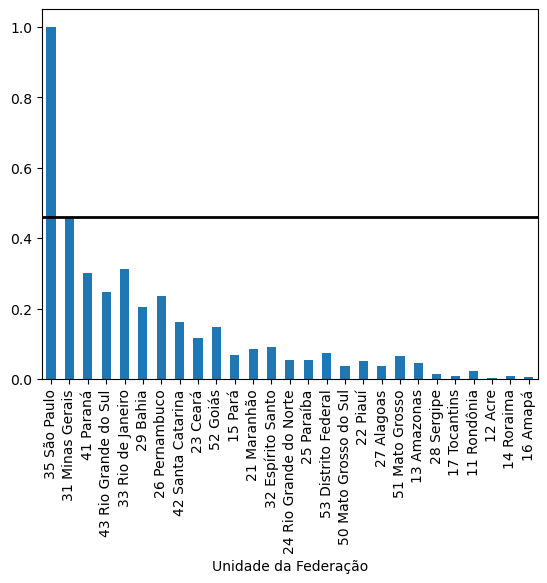

In [30]:
tabela_comparacao.plot(kind='bar')

plt.hlines(tabela_comparacao.loc['31 Minas Gerais'],
           -1,
           len(tabela_comparacao),
           color='k',
           lw=2)